In [1]:
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf


In [2]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')


In [3]:
import os
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

In [4]:
batch_size = 40
img_height = 256
img_width = 256

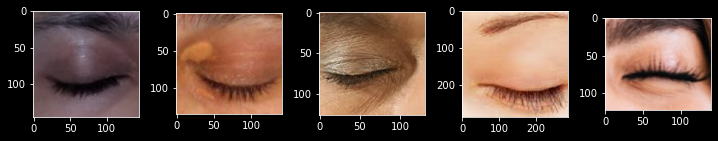

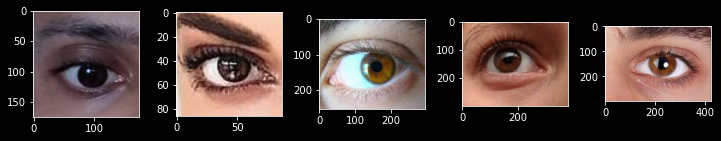

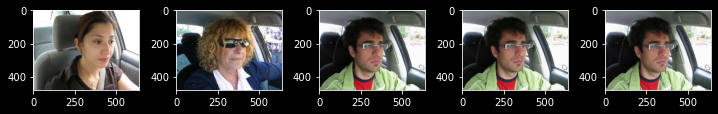

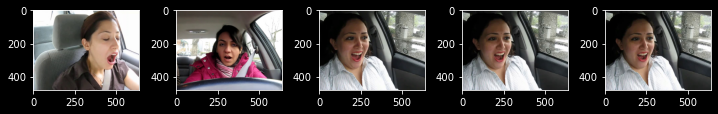

In [5]:
data_path = 'dataset_new/train'

directories = ['/Closed', '/Open', '/no_yawn', '/yawn']

for j in directories:
    plot_imgs(data_path+j)

In [6]:
#batch_size = 128
#train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  #rescale = 1./255, 
                                  #zoom_range = 0.2, 
                                  #validation_split = 0.1)

#test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
batch_size = 128

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=lambda img: tf.stack([img[:, :, 0], img[:, :, 1], tf.zeros_like(img[:, :, 0])], axis=-1),zoom_range = 0.2,
    validation_split = 0.1
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=lambda img: tf.stack([img[:, :, 0], img[:, :, 1], tf.zeros_like(img[:, :, 0])], axis=-1)
)

In [8]:
train_data_path = 'dataset_new/train'
test_data_path = 'dataset_new/test'

train_set = train_datagen.flow_from_directory(train_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_data_path, target_size = (256,256),
                                              batch_size = batch_size, 
                                              class_mode = 'categorical')

Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


In [9]:
classes = 4

model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (256,256,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 


model.add(Flatten())

model.add(Dense(32, activation = 'relu'))

model.add(Dense(classes, activation = 'softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [10]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

model_path="yawn_detection1.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

num_epochs = 10
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size

In [11]:
history = model.fit(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 1.5124 - accuracy: 0.4404
Epoch 1: val_accuracy improved from -inf to 0.57292, saving model to yawn_detection1.h5
19/19 [==============================] - 124s 7s/step - loss: 1.5124 - accuracy: 0.4404 - val_loss: 0.7186 - val_accuracy: 0.5729
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 0.6072 - accuracy: 0.6772
Epoch 2: val_accuracy improved from 0.57292 to 0.79167, saving model to yawn_detection1.h5
19/19 [==============================] - 113s 6s/step - loss: 0.6072 - accuracy: 0.6772 - val_loss: 0.5130 - val_accuracy: 0.7917
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 0.4511 - accuracy: 0.7909
Epoch 3: val_accuracy improved from 0.79167 to 0.79948, saving model to yawn_detection1.h5
19/19 [==============================] - 113s 6s/step - loss: 0.4511 - accuracy: 0.7909 - val_loss: 0.4294 - val_accuracy: 0.7995
Epoch 4/10
19/19 [==============================] - ETA: 0

In [12]:
score = model.evaluate(test_set)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 6s 1s/step - loss: 0.2576 - accuracy: 0.8915
Test loss: 0.2575794458389282
Test accuracy: 0.8914549946784973


In [13]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_set, steps=4500 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))

C:\Users\Senthil Nathan\AppData\Local\Temp\ipykernel_32292\1353234360.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set, steps=4500 // batch_size+1)


Confusion Matrix
[[28 22 32 27]
 [31 25 40 13]
 [26 30 28 25]
 [28 28 30 20]]
